<a href="https://colab.research.google.com/github/Srinithimahalakshmi/Data_science/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
df=pd.read_csv('/content/college_admission_performance_dataset.csv')

In [10]:
df.head()

,High_School_GPA,Extracurricular_Activities,Parental_Income,Hours_Studied_Per_Week,Entrance_Test_Score,Distance_From_College,Internet_Access,Final_Result_Score,Final_Result_Pass_Fail
0,3.63,0,44438,13,74,10.8,0,50.9,Pass
1,3.51,3,46330,8,84,20.0,0,51.1,Pass
2,3.99,4,72493,20,76,9.9,1,60.7,Pass
3,2.70,0,44373,19,79,1.6,0,47.6,Fail
4,3.35,2,60858,8,70,3.8,1,52.3,Pass


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   High_School_GPA             100 non-null    float64
 1   Extracurricular_Activities  100 non-null    int64  
 2   Parental_Income             100 non-null    int64  
 3   Hours_Studied_Per_Week      100 non-null    int64  
 4   Entrance_Test_Score         100 non-null    int64  
 5   Distance_From_College       100 non-null    float64
 6   Internet_Access             100 non-null    int64  
 7   Final_Result_Score          100 non-null    float64
 8   Final_Result_Pass_Fail      100 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 7.2+ KB


In [12]:
df.isnull().sum()

,0
High_School_GPA,0
Extracurricular_Activities,0
Parental_Income,0
Hours_Studied_Per_Week,0
Entrance_Test_Score,0
Distance_From_College,0
Internet_Access,0
Final_Result_Score,0
Final_Result_Pass_Fail,0


In [15]:
df.describe()

,High_School_GPA,Extracurricular_Activities,Parental_Income,Hours_Studied_Per_Week,Entrance_Test_Score,Distance_From_College,Internet_Access,Final_Result_Score
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000
mean,2.985300,1.940000,53828.450000,13.090000,68.010000,15.463000,0.43000,46.014000
std,0.590038,1.347051,16324.232404,4.050427,16.923175,9.243088,0.49757,7.268265
min,2.010000,0.000000,20247.000000,5.000000,40.000000,1.000000,0.00000,28.700000
25%,2.550000,1.000000,44258.000000,10.000000,52.750000,6.975000,0.00000,40.875000
50%,3.010000,2.000000,52127.000000,13.000000,69.000000,14.600000,0.00000,45.000000
75%,3.427500,3.000000,66367.750000,16.000000,81.000000,24.125000,1.00000,50.900000
max,3.990000,4.000000,79992.000000,20.000000,100.000000,30.000000,1.00000,65.100000


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


In [106]:
features=['High_School_GPA','Extracurricular_Activities','Parental_Income','Hours_Studied_Per_Week',
    'Entrance_Test_Score',
    'Distance_From_College',
    'Internet_Access']

In [107]:
X1=df[features]

In [108]:
Y1=df['Final_Result_Score']

In [109]:
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X1,Y1,test_size=0.2,random_state=42)

In [110]:
df["Final_Result_Score"] = df["Final_Result_Score"].fillna(df["Final_Result_Score"].mean())


In [111]:

linmodel=LinearRegression()
linmodel.fit(X1_train,Y1_train)


LinearRegression()

In [114]:
Y1_pred=linmodel.predict(X1_test)

In [115]:
mse = mean_squared_error(Y1_test, Y1_pred)
rmse = mse ** 0.5

In [94]:
print("Linear Regression: Predicting Final Score")
print("Mean Squared Error: {mse:.2f}")
print("Root Mean Squared Error: {rmse:.2f}")

Linear Regression: Predicting Final Score
Mean Squared Error: {mse:.2f}
Root Mean Squared Error: {rmse:.2f}


In [116]:
X2=df[features]

In [117]:
Y2=df['Final_Result_Pass_Fail']

In [118]:
Y2 = df["Final_Result_Pass_Fail"].map({"Pass": 1, "Fail": 0})

In [119]:
X2_train,X2_test,Y2_train,Y2_test=train_test_split(X2,Y2,test_size=0.2,random_state=42)

In [120]:
modellog=LogisticRegression()
modellog.fit(X2_train,Y2_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [123]:
Y2_pred=modellog.predict(X2_test)
accuracy=accuracy_score(Y2_test,Y2_pred)
classification_report=classification_report(Y2_test,Y2_pred)

In [124]:
print(accuracy)
print(classification_report)


0.6
              precision    recall  f1-score   support

           0       0.67      0.77      0.71        13
           1       0.40      0.29      0.33         7

    accuracy                           0.60        20
   macro avg       0.53      0.53      0.52        20
weighted avg       0.57      0.60      0.58        20



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


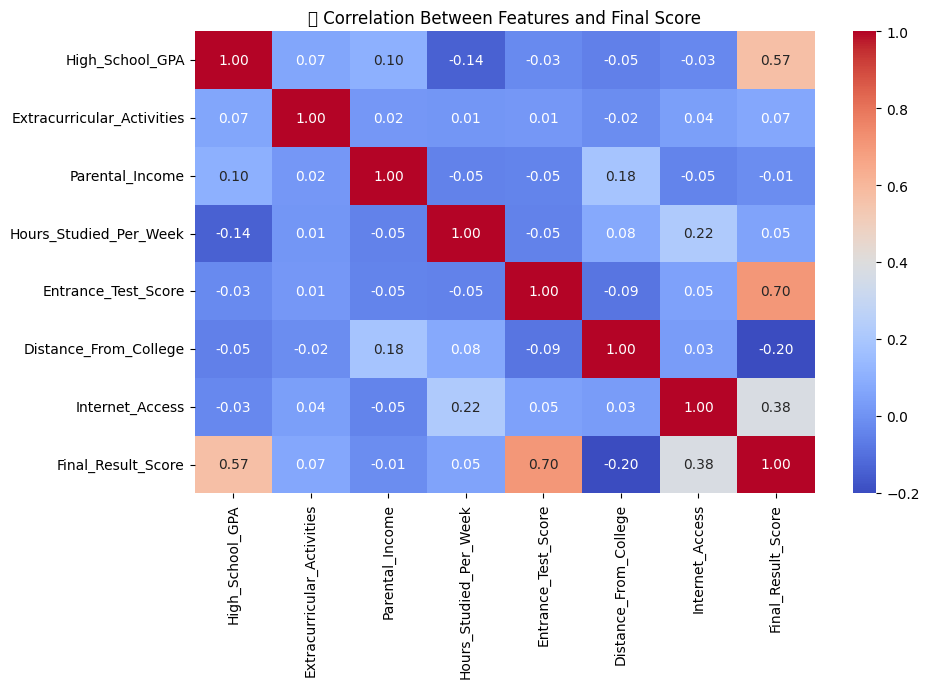

In [127]:
plt.figure(figsize=(10, 6))
corr = df[features + ["Final_Result_Score"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("🔍 Correlation Between Features and Final Score")
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


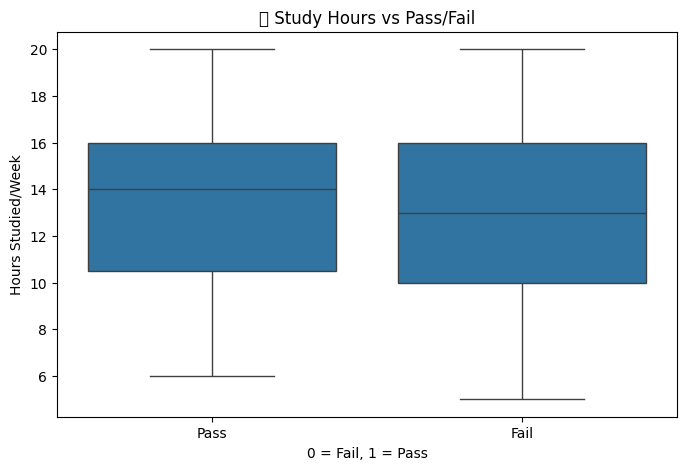

In [128]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Final_Result_Pass_Fail", y="Hours_Studied_Per_Week", data=df)
plt.title("📚 Study Hours vs Pass/Fail")
plt.xlabel("0 = Fail, 1 = Pass")
plt.ylabel("Hours Studied/Week")
plt.show()